5) Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa

-> Cadeia Homogênea

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 


#Parametros
m, k, m1 = 1.0, 1.0, 5.0
N1, N2, N3 = 100, 1000, 10000

In [12]:
#Para N = 100

#matriz elastica
K = np.zeros((N1, N1))

for i in range(N1-1): #tamanho da cadeia
    K[i,i] = 2 * k #diagonal (massas com 2 vizinhos)
    K[i, (i - 1) % N1] = -k #vizinho anterior
    K[i, (i + 1) % N1] = -k #vizinho posterior

#matriz de massa
M = np.eye(N1) * m

#Verificando se as matrizes são hermitianas
sp.linalg.ishermitian(M)
sp.linalg.ishermitian(K)

ww100, v100 = sp.linalg.eigh(K, M) #autovalores (omega^2) e autovetores (modos normais)
w100 = np.sqrt(np.abs(ww100)) #frequencias naturais


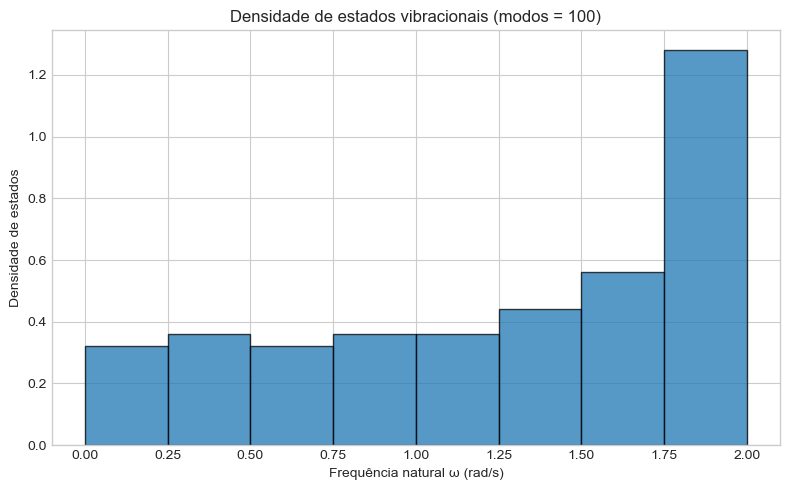

In [15]:
#grafico para N100
plt.figure(figsize=(8, 5))
plt.hist(w100, bins=8, density=True, edgecolor='black', alpha=0.75)
plt.xlabel('Frequência natural ω (rad/s)')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados vibracionais (modos = {})'.format(N1))
plt.grid(True)
plt.tight_layout()
plt.show()
